In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/Mydrive")

Drive already mounted at /content/Mydrive; to attempt to forcibly remount, call drive.mount("/content/Mydrive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/Mydrive/MyDrive/accepted_2007_to_2018Q4.csv")

<ipython-input-8-33d772289207>:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/Mydrive/MyDrive/accepted_2007_to_2018Q4.csv")


In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data["issue_d"]

0          Dec-2015
1          Dec-2015
2          Dec-2015
3          Dec-2015
4          Dec-2015
             ...   
2260696    Oct-2016
2260697    Oct-2016
2260698    Oct-2016
2260699         NaN
2260700         NaN
Name: issue_d, Length: 2260701, dtype: object

In [ ]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [ ]:
data.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,...,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,...,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,...,0.0,129.040594,0.0,9.671178,375.385500,7625.988281,198.629496,3693.122590,7.311822,8.159980
min,NaN,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,3.0,0.640000,3.0,0.000000,1.920000,55.730000,0.010000,44.210000,0.200000,0.000000
25%,NaN,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.516500e+02,4.600000e+04,1.189000e+01,0.000000e+00,6.750000e+02,...,3.0,59.440000,3.0,5.000000,175.230000,5627.000000,44.440000,2208.000000,45.000000,6.000000
50%,NaN,1.290000e+04,1.287500e+04,1.280000e+04,1.262000e+01,3.779900e+02,6.500000e+04,1.784000e+01,0.000000e+00,6.900000e+02,...,3.0,119.140000,3.0,15.000000,352.770000,10028.390000,133.160000,4146.110000,45.000000,14.000000
75%,NaN,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.933200e+02,9.300000e+04,2.449000e+01,0.000000e+00,7.150000e+02,...,3.0,213.260000,3.0,22.000000,620.175000,16151.890000,284.190000,6850.172500,50.000000,18.000000
max,NaN,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,3.0,943.940000,3.0,37.000000,2680.890000,40306.410000,1407.860000,33601.000000,521.350000,181.000000


In [ ]:
data["application_type"].unique()

array(['Individual', 'Joint App', nan], dtype=object)

In [ ]:
data=data[data["application_type"] == "Individual"]#individual만 있는 값만 추출

In [ ]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,NaN,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260695,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0


In [ ]:
data['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'Oct-20

In [ ]:
drop_index = data[data['issue_d'].str.contains('2015|2016')==False].index

In [ ]:
new_data=data.drop(drop_index)

In [ ]:
new_data['issue_d'].unique()# 2015년, 2016년 데이터만 추출했다.

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', 'Jun-2016', 'May-2016', 'Apr-2016',
       'Mar-2016', 'Feb-2016', 'Jan-2016', 'Sep-2016', 'Aug-2016',
       'Jul-2016', 'Dec-2016', 'Nov-2016', 'Oct-2016'], dtype=object)

In [ ]:
new_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,68426831,NaN,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,NaN,24000.0,24000.0,24000.0,60 months,12.79,543.50,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260695,88977788,NaN,24000.0,24000.0,24000.0,60 months,10.49,515.74,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0


In [ ]:
pd.set_option('display.max_seq_items', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
#컬럼명 출력 생략 없이 다 하기

In [ ]:
#  pd.options.display.max_rows = 60
# pd.options.display.max_columns = 20
# # #원래대로 되돌릴때

In [ ]:
new_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_co

In [ ]:
explain=pd.read_excel("/content/Mydrive/MyDrive/(씨즈데이터)사전과제_LendingClub_Layout.xlsx")

In [ ]:
explain=explain[explain["모형\n제외항목"]== "Y"]

In [ ]:
explain["컬럼명"].unique()

array(['member_id', 'int_rate', 'grade', 'sub_grade', 'loan_status',
       'pymnt_plan', 'fico_range_low', 'fico_range_high', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'delinq_amnt', 'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex

In [ ]:
new_data_1=new_data.drop(['member_id', 'int_rate', 'grade', 'sub_grade',
       'pymnt_plan', 'fico_range_low', 'fico_range_high', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'delinq_amnt', 'revol_bal_joint', 'sec_app_fico_range_low',
       'sec_app_fico_range_high', 'sec_app_earliest_cr_line',
       'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
       'sec_app_revol_util', 'sec_app_open_act_il',
       'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag',
       'hardship_type', 'hardship_reason', 'hardship_status',
       'deferral_term', 'hardship_amount', 'hardship_start_date',
       'hardship_end_date', 'payment_plan_start_date', 'hardship_length',
       'hardship_dpd', 'hardship_loan_status',
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],axis=1)

In [ ]:
new_data_1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'installment', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'policy_code', 'acc_now_delinq', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_ac

In [ ]:
df=new_data_1

In [ ]:
df

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,68407277,3600.0,3600.0,3600.0,36 months,123.03,leadman,10+ years,MORTGAGE,55000.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash
1,68355089,24700.0,24700.0,24700.0,36 months,820.28,Engineer,10+ years,MORTGAGE,65000.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash
3,66310712,35000.0,35000.0,35000.0,60 months,829.90,Information Systems Officer,10+ years,MORTGAGE,110000.0,...,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,Cash
4,68476807,10400.0,10400.0,10400.0,60 months,289.91,Contract Specialist,3 years,MORTGAGE,104433.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash
5,68426831,11950.0,11950.0,11950.0,36 months,405.18,Veterinary Tecnician,4 years,RENT,34000.0,...,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260694,89885898,24000.0,24000.0,24000.0,60 months,543.50,Unit Operator,7 years,MORTGAGE,95000.0,...,3.0,100.0,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,Cash
2260695,88977788,24000.0,24000.0,24000.0,60 months,515.74,Database Administrator,10+ years,MORTGAGE,108000.0,...,0.0,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,Cash
2260696,88985880,40000.0,40000.0,40000.0,60 months,859.56,Vice President,9 years,MORTGAGE,227000.0,...,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,Cash
2260697,88224441,24000.0,24000.0,24000.0,60 months,564.56,Program Manager,6 years,RENT,110000.0,...,1.0,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,Cash


In [ ]:
df.info()


# open_acc_6m                       399437
# open_act_il                       399436
# open_il_12m                       399436
# open_il_24m                       399436
# mths_since_rcnt_il                411512
# total_bal_il                      399436
# il_util                           458370
# open_rv_12m                       399436
# open_rv_24m                       399436
# max_bal_bc                        399436
# all_util                          399459
# total_rev_hi_lim                       0
# inq_fi                            399436
# total_cu_tl                       399437
# inq_last_12m

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846202 entries, 0 to 2260698
Data columns (total 85 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              846202 non-null  object 
 1   loan_amnt                       846202 non-null  float64
 2   funded_amnt                     846202 non-null  float64
 3   funded_amnt_inv                 846202 non-null  float64
 4   term                            846202 non-null  object 
 5   installment                     846202 non-null  float64
 6   emp_title                       794749 non-null  object 
 7   emp_length                      795101 non-null  object 
 8   home_ownership                  846202 non-null  object 
 9   annual_inc                      846202 non-null  float64
 10  verification_status             846202 non-null  object 
 11  issue_d                         846202 non-null  object 
 12  loan_status    

In [ ]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,846202.000000,846202.000000,846202.000000,846202.000000,8.462020e+05,846202.000000,846202.000000,846201.000000,441669.000000,155390.000000,...,846202.000000,846202.000000,846202.000000,837441.000000,846202.000000,846202.000000,8.462020e+05,8.462020e+05,8.462020e+05,8.462020e+05
mean,14926.175163,14926.153891,14920.029819,441.346199,7.845555e+04,18.885749,0.353944,0.567448,33.798892,66.824249,...,0.094850,2.200080,93.772642,45.152967,0.137431,0.069148,1.758845e+05,5.236924e+04,2.218945e+04,4.427466e+04
std,8768.453543,8768.454442,8765.655658,257.543509,7.596141e+04,8.613173,0.938417,0.865204,21.945461,25.043429,...,0.531929,1.898701,9.091019,36.195487,0.392017,0.460063,1.799067e+05,4.961874e+04,2.207140e+04,4.471165e+04
min,1000.000000,1000.000000,775.000000,14.010000,3.000000e+03,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,255.000000,4.750000e+04,12.410000,0.000000,0.000000,15.000000,51.000000,...,0.000000,1.000000,90.900000,10.000000,0.000000,0.000000,5.116100e+04,2.223900e+04,8.000000e+03,1.583400e+04
50%,13000.000000,13000.000000,13000.000000,378.470000,6.500000e+04,18.350000,0.000000,0.000000,30.000000,68.000000,...,0.000000,2.000000,97.300000,42.900000,0.000000,0.000000,1.127475e+05,3.937400e+04,1.550000e+04,3.345900e+04
75%,20000.000000,20000.000000,20000.000000,582.450000,9.400000e+04,25.010000,0.000000,1.000000,49.000000,83.000000,...,0.000000,3.000000,100.000000,75.000000,0.000000,0.000000,2.527820e+05,6.597000e+04,2.890000e+04,5.930700e+04
max,40000.000000,40000.000000,40000.000000,1584.900000,9.573072e+06,49.960000,39.000000,6.000000,195.000000,121.000000,...,39.000000,32.000000,100.000000,100.000000,11.000000,85.000000,9.999999e+06,2.921551e+06,1.105500e+06,2.101913e+06


In [ ]:
df=df[df["loan_status"]!= 'In Grace Period']

In [ ]:
df["loan_status"].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'Late (16-30 days)', 'Default'], dtype=object)

In [ ]:
df["loan_status"][df["loan_status"]== 'Fully Paid']= 0
df["loan_status"][df["loan_status"]== 'Current']= 0
#정상

<ipython-input-36-652aa7e151ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Fully Paid']= 0
<ipython-input-36-652aa7e151ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Fully Paid']= 0
<ipython-input-36-652aa7e151ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Current']= 0
<ipython-input-36-652aa7e151ac>:2:

In [ ]:
df["loan_status"][df["loan_status"]== 'Charged Off']= 1
df["loan_status"][df["loan_status"]== 'Late (31-120 days)']= 1
df["loan_status"][df["loan_status"]== 'Late (16-30 days)']= 1
df["loan_status"][df["loan_status"]== 'Default']= 1
#불량

<ipython-input-37-b284492c8290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Charged Off']= 1
<ipython-input-37-b284492c8290>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Charged Off']= 1
<ipython-input-37-b284492c8290>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"][df["loan_status"]== 'Late (31-120 days)']= 1
<ipython-input-37-b28

In [ ]:
pd.options.display.max_rows=60
pd.options.display.max_columns=20

In [ ]:
df["loan_status"].value_counts()

0    694282
1    149584
Name: loan_status, dtype: int64

In [ ]:
df["loan_status"]=df["loan_status"].astype("int64")

<ipython-input-40-cefd3865433e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["loan_status"]=df["loan_status"].astype("int64")


In [ ]:
df["mo_sin_old_il_acct"].unique()

array([148., 113.,  36., 128., 338., 142., 149., 164., 155., 150., 147.,
        46., 115.,  82., 234., 109., 163., 129., 114., 131.,  50., 124.,
        47.,  63., 160., 141., 256.,  93., 126.,  76.,  21., 111.,  10.,
       106., 134., 159.,  73., 186., 102., 122., 127., 140., 112.,  94.,
       104., 139., 143., 206., 120., 138., 135.,  79., 151.,  90., 118.,
       123., 166., 194.,  24., 172.,  nan, 183., 154.,  13., 165.,  87.,
        99.,  64., 177., 260., 167.,  39., 156., 136.,   9., 103., 239.,
       110.,  52., 254.,  98.,  81., 125., 196., 101.,  14., 157., 116.,
       229.,  66.,  91.,  33.,  77.,  67., 121., 146., 100., 275.,  53.,
        92.,  43.,  18.,  89.,  51.,  17., 228., 222., 107.,  28.,   8.,
       184., 220.,  70.,  49.,  15., 303., 162.,  35., 175., 170., 266.,
       205., 119., 244., 190.,  78.,  75.,  29.,  42.,  72., 132., 232.,
       145., 181.,  41., 137., 161.,  19.,  71., 158., 227.,   3.,  83.,
       144., 242., 105.,  88., 171.,  56.,  54., 11

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.isna().sum()# 총 데이터 개수가 846000여개 정도

#지울항목들
# 'zip_code','url','desc','title','mths_since_last_delinq','mths_since_last_record ','policy_code','mths_since_recent_bc_dlq ','mths_since_recent_revol_delinq',
  #여긴 지우긴 하나 모델 성능이 안좋을 경우 다시 고려해야 한다.(결측치가 절반 가량이긴 하지만 loan_status랑 상관성도 나쁘지 않고 feature중요도도 그렇게 떨어지지는 )
      # 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
      #  'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
      #  'all_util','inq_fi', 'total_cu_tl', 'inq_last_12m'
#좀 더 고민해볼 것들
#'emp_title','emp_length'
#purpose도 debt_consolidation, credit_dard, 그 외 "삶의 질 개선"으로 해서 총 3개의 범주로 하면 될 듯
#title은 purpose랑 비슷해서 굳이 살릴필요없을 듯, 결측치도 적지 않고
#inq_last_6mths는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#bc_open_to_buy는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#bc_util는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#chargeoff_within_12_mths
#mo_sin_old_ill_acct는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#mths_since_recent_bc 는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#mths_since_recent_inq  는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#num_tl_120dpd_2m는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#percent_bc_gt_75는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체

id                                     0
loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
term                                   0
installment                            0
emp_title                          51340
emp_length                         50991
home_ownership                         0
annual_inc                             0
verification_status                    0
issue_d                                0
loan_status                            0
url                                    0
desc                              843798
purpose                                0
title                              22338
zip_code                               0
addr_state                             0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         1
mths_since_last_delinq            403504
mths_since_last_

In [ ]:
pd.options.display.max_rows=60
pd.options.display.max_columns=20

In [ ]:
#지울항목들
# 'url','desc','title','mths_since_last_delinq','mths_since_last_record ','policy_code','mths_since_recent_bc_dlq ','mths_since_recent_revol_delinq',
  #여긴 지우긴 하나 모델 성능이 안좋을 경우 다시 고려해야 한다.(결측치가 절반 가량이긴 하지만 loan_status랑 상관성도 나쁘지 않고 feature중요도도 그렇게 떨어지지는 )
      # 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
      #  'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
      #  'all_util','inq_fi', 'total_cu_tl', 'inq_last_12m'

df_63=df.drop(['url','zip_code','desc','title','mths_since_last_delinq','mths_since_last_record','policy_code',
         'mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','open_acc_6m', 'open_act_il',
         'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il','total_bal_il', 'il_util', 'open_rv_12m',
         'open_rv_24m', 'max_bal_bc','all_util','inq_fi', 'total_cu_tl', 'inq_last_12m'],axis=1)

#"emp_title"의 경우 직업군을 분류해서 범주형으로 하는건 의미가 있을 것 같으나 지금과 같은 세부 직업은 의미가 없을 것 같다.(직업 20만개)
#
df_63=df_63.drop(["emp_title"],axis=1)
#"emp_length"의 경우 근속기간은 의미가 있을 것 같고 (재정의 안정성을 나타낼 수 있으니까)결측치는 평균 혹은 중앙값, 0부터 11로 값을 바꾸고
#숫자간의 관계성이 있으므로 더미변수화 시킬 필요는 없을 것 같다..

In [ ]:
#삭제할 feature:
#삭제할 feature: 'policy code' (값이 1밖에 없음)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.corr()

<ipython-input-46-a3c17ab45d3c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,policy_code,acc_now_delinq,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
loan_amnt,1.000000,0.999999,0.999992,0.945308,0.308242,0.035412,0.015957,-0.008307,-0.026758,-0.020846,-0.024196,0.186965,-0.069357,0.328867,0.121937,0.211241,NaN,0.000230,-0.019058,0.025630,0.004846,0.031657,-0.015093,0.155118,-0.094410,-0.043381,-0.028902,0.382257,0.009071,0.340167,0.009808,0.070949,0.010203,-0.000587,0.233962,0.201339,0.062557,-0.002975,0.131268,0.182289,0.056092,0.031641,0.233416,0.041923,-0.042316,0.001190,-0.033316,-0.053992,0.210243,0.165737,0.228241,0.212252,0.075504,0.173707,0.181252,0.164511,0.187270,-0.001012,0.002362,-0.026266,-0.029912,0.093356,0.029938,-0.102511,0.008310,0.342396,0.287578,0.386427,0.208264
funded_amnt,0.999999,1.000000,0.999993,0.945310,0.308243,0.035414,0.015956,-0.008306,-0.026757,-0.020846,-0.024196,0.186967,-0.069356,0.328867,0.121935,0.211243,NaN,0.000231,-0.019056,0.025632,0.004849,0.031660,-0.015093,0.155119,-0.094411,-0.043379,-0.028898,0.382258,0.009068,0.340168,0.009811,0.070951,0.010205,-0.000584,0.233963,0.201339,0.062556,-0.002975,0.131268,0.182291,0.056093,0.031641,0.233418,0.041923,-0.042316,0.001188,-0.033316,-0.053991,0.210243,0.165738,0.228242,0.212253,0.075505,0.173709,0.181254,0.164512,0.187272,-0.001012,0.002362,-0.026265,-0.029911,0.093354,0.029938,-0.102510,0.008310,0.342397,0.287579,0.386427,0.208265
funded_amnt_inv,0.999992,0.999993,1.000000,0.945249,0.308281,0.035343,0.015825,-0.008340,-0.026823,-0.020801,-0.024123,0.186950,-0.069374,0.328862,0.121860,0.211248,NaN,0.000207,-0.019100,0.025621,0.004831,0.031639,-0.015077,0.155106,-0.094409,-0.043424,-0.028949,0.382270,0.009040,0.340209,0.009789,0.070944,0.010160,-0.000656,0.234010,0.201427,0.062477,-0.002989,0.131299,0.182335,0.056128,0.031682,0.233464,0.041955,-0.042305,0.001238,-0.033286,-0.054025,0.210219,0.165692,0.228246,0.212271,0.075492,0.173695,0.181261,0.164466,0.187256,-0.001030,0.002343,-0.026286,-0.029979,0.093394,0.029866,-0.102512,0.008289,0.342450,0.287565,0.386494,0.208252
installment,0.945308,0.945310,0.945249,1.000000,0.295331,0.039578,0.016477,-0.000545,0.003075,-0.024567,-0.032903,0.171659,-0.054210,0.307698,0.126324,0.184969,NaN,0.003607,0.003904,0.019706,0.022207,0.041146,-0.019725,0.142578,-0.082860,-0.014347,0.000565,0.353210,0.025128,0.309086,0.022683,0.061060,0.033063,0.023657,0.207197,0.170411,0.072418,-0.001130,0.104010,0.154853,0.035734,0.016434,0.197640,0.022130,-0.039044,-0.017312,-0.032907,-0.042849,0.203539,0.164059,0.214703,0.193988,0.059126,0.165347,0.165913,0.162247,0.171766,0.000573,0.005035,-0.020459,0.001367,0.075123,0.039323,-0.090291,0.015782,0.307053,0.266146,0.348356,0.189953
annual_inc,0.308242,0.308243,0.308281,0.295331,1.000000,-0.039742,-0.170232,0.035859,0.025181,-0.038470,-0.083170,0.128158,-0.002550,0.276807,0.043680,0.162959,NaN,0.012755,0.038020,0.066509,0.082007,0.103271,-0.070146,0.210392,-0.039525,-0.006158,-0.013415,0.266906,0.012030,0.273206,0.052476,0.046176,0.064825,0.052023,0.295002,0.148256,0.004208,0.005930,0.106842,0.131780,0.029777,-0.025750

In [ ]:
pd.options.display.max_rows=60
pd.options.display.max_columns=20

##범주형 변수들 처리

In [ ]:
df_63=df_63.reset_index()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_63["emp_length"][df_63["emp_length"]=='10+ years']=10
df_63["emp_length"][df_63["emp_length"]=='9 years']=9
df_63["emp_length"][df_63["emp_length"]=='8 years']=8
df_63["emp_length"][df_63["emp_length"]=='7 years']=7
df_63["emp_length"][df_63["emp_length"]=='6 years']=6
df_63["emp_length"][df_63["emp_length"]=='5 years']=5
df_63["emp_length"][df_63["emp_length"]=='4 years']=4
df_63["emp_length"][df_63["emp_length"]=='3 years']=3
df_63["emp_length"][df_63["emp_length"]=='2 years']=2
df_63["emp_length"][df_63["emp_length"]=='1 year']=1
df_63["emp_length"][df_63["emp_length"]=='< 1 year']=0

<ipython-input-50-c9a5f92b3f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["emp_length"][df_63["emp_length"]=='10+ years']=10
<ipython-input-50-c9a5f92b3f1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["emp_length"][df_63["emp_length"]=='9 years']=9
<ipython-input-50-c9a5f92b3f1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["emp_length"][df_63["emp_length"]=='8 years']=8
<ipython-input-50-c9a5f92b3f1d>

In [ ]:
df_63["emp_length"].unique()

array([10, 3, 4, 6, 1, 7, 8, 5, 2, 9, 0, nan], dtype=object)

In [ ]:
df_63["emp_length"]=df_63["emp_length"].fillna(df_63["emp_length"].median())

In [ ]:
df_63["emp_length"]=df_63["emp_length"].astype("float64")

In [ ]:
df_63["emp_length"].unique()

array([10.,  3.,  4.,  6.,  1.,  7.,  8.,  5.,  2.,  9.,  0.])

<Axes: xlabel='emp_length', ylabel='Count'>

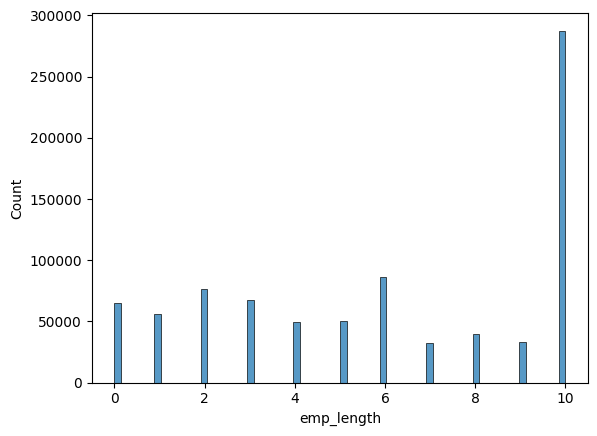

In [ ]:
sns.histplot(x="emp_length",data=df_63)

In [ ]:
df_63.columns[df_63.dtypes == "object"]

Index(['id', 'term', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'disbursement_method'],
      dtype='object')

In [ ]:
df_63["term"].unique()#

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
df_63['home_ownership'].unique()#원핫인코딩

array(['MORTGAGE', 'RENT', 'OWN', 'ANY'], dtype=object)

In [ ]:
df_63['verification_status'].unique()#원핫인코딩

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [ ]:
df_63['issue_d'].unique()#lstm도 생각해볼만 한데 그러기엔 너무 범위가 크다 시계열보다는 하나의 변수로 반영하는게 나을것 같은데

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', 'Jun-2016', 'May-2016', 'Apr-2016',
       'Mar-2016', 'Feb-2016', 'Jan-2016', 'Sep-2016', 'Aug-2016',
       'Jul-2016', 'Dec-2016', 'Nov-2016', 'Oct-2016'], dtype=object)

In [ ]:
change_purpose_index=df_63[df_63["purpose"].str.contains('debt_consolidation|credit_card')==False].index

In [ ]:
df_63["purpose"].loc[change_purpose_index]= "etc" #etc라 표기했지만 etc에 해당하는 값들은 대부분 삶의질(사치품)등을 위한 대출(자동차나 집,이사 등)

<ipython-input-62-1670473e5f3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["purpose"].loc[change_purpose_index]= "etc" #etc라 표기했지만 etc에 해당하는 값들은 대부분 삶의질(사치품)등을 위한 대출(자동차나 집,이사 등)


In [ ]:
df_63['addr_state'].unique()# 지역을 범주화 더미변수화하면 변수만 49개 나오긴 하는데..

array(['PA', 'SD', 'NJ', 'GA', 'MN', 'SC', 'RI', 'TX', 'NC', 'CA', 'VA',
       'AZ', 'NY', 'IN', 'MD', 'KS', 'NM', 'AL', 'WA', 'MO', 'OH', 'LA',
       'IL', 'FL', 'CO', 'MI', 'TN', 'DC', 'MA', 'WI', 'HI', 'VT', 'DE',
       'NH', 'NE', 'CT', 'OR', 'AR', 'NV', 'WV', 'MT', 'WY', 'OK', 'KY',
       'MS', 'ME', 'UT', 'ND', 'AK', 'ID'], dtype=object)

In [ ]:
df_63['earliest_cr_line'].unique()# 첫 credit line에 관한 feature인데 얘는 10년단위로 바꾸는게 나을듯
#193
#194
#195
#196
#197
#198
#199
#200
#201

array(['Aug-2003', 'Dec-1999', 'Sep-2008', 'Jun-1998', 'Oct-1987',
       'Jun-1990', 'Feb-1999', 'Apr-2002', 'Nov-1994', 'Apr-1995',
       'Feb-1988', 'Jun-1996', 'Jun-2005', 'May-1984', 'Dec-2001',
       'Nov-1993', 'Sep-2001', 'Mar-2005', 'May-2004', 'Jun-1991',
       'May-2000', 'Oct-2011', 'May-1994', 'Jul-2011', 'May-1991',
       'May-2001', 'Jun-2002', 'Dec-1985', 'Apr-2007', 'Feb-2002',
       'Jun-2001', 'Jun-1997', 'Oct-1996', 'Jan-2005', 'Jul-2001',
       'Aug-2004', 'Jun-2007', 'Jul-2004', 'Apr-2001', 'Oct-2004',
       'May-1992', 'Oct-1999', 'Nov-2001', 'Oct-2005', 'Jan-2001',
       'Sep-2004', 'Sep-1993', 'Nov-2005', 'Feb-1989', 'Sep-2006',
       'Oct-1982', 'Oct-2002', 'Feb-1990', 'Aug-1987', 'Oct-1998',
       'Aug-2001', 'Feb-2004', 'Aug-2009', 'Nov-1999', 'Jun-2006',
       'Jan-1999', 'Jun-2000', 'Jan-2007', 'Dec-1998', 'Aug-1997',
       'Dec-1987', 'Feb-1996', 'Apr-1990', 'Jun-2004', 'Jun-1995',
       'Dec-2002', 'Aug-1986', 'Nov-2002', 'Oct-2006', 'Sep-20

In [ ]:
index_193=df_63[df_63["earliest_cr_line"].str.contains('193')].index
index_194=df_63[df_63["earliest_cr_line"].str.contains('194')].index
index_195=df_63[df_63["earliest_cr_line"].str.contains('195')].index
index_196=df_63[df_63["earliest_cr_line"].str.contains('196')].index
index_197=df_63[df_63["earliest_cr_line"].str.contains('197')].index
index_198=df_63[df_63["earliest_cr_line"].str.contains('198')].index
index_199=df_63[df_63["earliest_cr_line"].str.contains('199')].index
index_200=df_63[df_63["earliest_cr_line"].str.contains('200')].index
index_201=df_63[df_63["earliest_cr_line"].str.contains('201')].index


In [ ]:
df_63["earliest_cr_line"].loc[index_193]=1930
df_63["earliest_cr_line"].loc[index_194]=1940
df_63["earliest_cr_line"].loc[index_195]=1950
df_63["earliest_cr_line"].loc[index_196]=1960
df_63["earliest_cr_line"].loc[index_197]=1970
df_63["earliest_cr_line"].loc[index_198]=1980
df_63["earliest_cr_line"].loc[index_199]=1990
df_63["earliest_cr_line"].loc[index_200]=2000
df_63["earliest_cr_line"].loc[index_201]=2010

<ipython-input-66-428046bff8aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["earliest_cr_line"].loc[index_193]=1930
<ipython-input-66-428046bff8aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["earliest_cr_line"].loc[index_194]=1940
<ipython-input-66-428046bff8aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["earliest_cr_line"].loc[index_195]=1950
<ipython-input-66-428046bff8aa>:4: SettingWithCopyWarning:

In [ ]:
df_63["earliest_cr_line"].unique()

array([2000, 1990, 1980, 2010, 1950, 1970, 1960, 1940, 1930], dtype=object)

In [ ]:
df_63[["earliest_cr_line"]]

,earliest_cr_line
0,2000
1,1990
2,2000
3,1990
4,1980
...,...
843861,1990
843862,1990
843863,1990
843864,1990


In [ ]:
df_63['initial_list_status'].unique()# 더미변수

array(['w', 'f'], dtype=object)

In [ ]:
df_63['disbursement_method'].unique()#더미변수

array(['Cash', 'DirectPay'], dtype=object)

In [ ]:
df_63.columns[df_63.dtypes !="object"]

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il

<Axes: xlabel='issue_d', ylabel='count'>

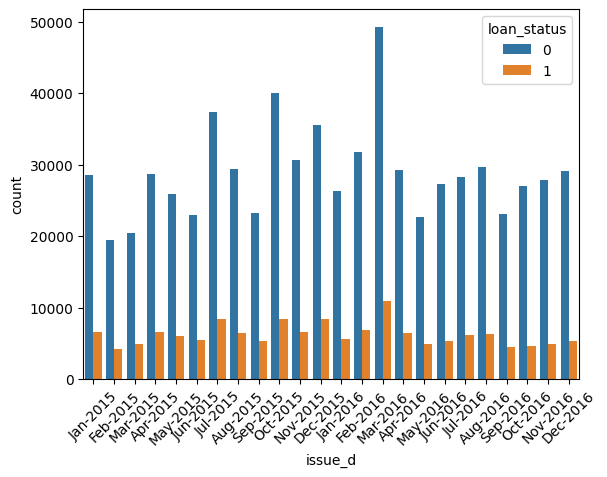

In [ ]:
plt.xticks(rotation=45)
sns.countplot(x="issue_d",data=df_63, order = ['Jan-2015', 'Feb-2015', 'Mar-2015','Apr-2015','May-2015','Jun-2015','Jul-2015','Aug-2015','Sep-2015','Oct-2015','Nov-2015',
                                               'Dec-2015','Jan-2016', 'Feb-2016', 'Mar-2016',
                                               'Apr-2016','May-2016','Jun-2016','Jul-2016','Aug-2016','Sep-2016','Oct-2016','Nov-2016','Dec-2016'],hue=df_63["loan_status"])
#월별 패턴은 없어 보인다. 카이제곱검정을 할까..?
#불량자와 정상자 비율은 거의 모든 월이 비슷한 수준인듯
# 월단위도 쓰고, 연단위로도 범주화를 한번 해보자


In [ ]:
year_index_15=df_63[df_63["issue_d"].str.contains("2015")].index
year_index_16=df_63[df_63["issue_d"].str.contains("2016")].index
index_month_1=df_63[df_63["issue_d"].str.contains("Jan")].index
index_month_2=df_63[df_63["issue_d"].str.contains("Feb")].index
index_month_3=df_63[df_63["issue_d"].str.contains("Mar")].index
index_month_4=df_63[df_63["issue_d"].str.contains("Apr")].index
index_month_5=df_63[df_63["issue_d"].str.contains("May")].index
index_month_6=df_63[df_63["issue_d"].str.contains("Jun")].index
index_month_7=df_63[df_63["issue_d"].str.contains("Jul")].index
index_month_8=df_63[df_63["issue_d"].str.contains("Aug")].index
index_month_9=df_63[df_63["issue_d"].str.contains("Sep")].index
index_month_10=df_63[df_63["issue_d"].str.contains("Oct")].index
index_month_11=df_63[df_63["issue_d"].str.contains("Nov")].index
index_month_12=df_63[df_63["issue_d"].str.contains("Dec")].index

In [ ]:
df_63

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,home_ownership,annual_inc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,0,68407277,3600.0,3600.0,3600.0,36 months,123.03,10.0,MORTGAGE,55000.0,...,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,Cash
1,1,68355089,24700.0,24700.0,24700.0,36 months,820.28,10.0,MORTGAGE,65000.0,...,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,Cash
2,3,66310712,35000.0,35000.0,35000.0,60 months,829.90,10.0,MORTGAGE,110000.0,...,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,Cash
3,4,68476807,10400.0,10400.0,10400.0,60 months,289.91,3.0,MORTGAGE,104433.0,...,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,Cash
4,5,68426831,11950.0,11950.0,11950.0,36 months,405.18,4.0,RENT,34000.0,...,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843861,2260694,89885898,24000.0,24000.0,24000.0,60 months,543.50,7.0,MORTGAGE,95000.0,...,3.0,100.0,NaN,0.0,0.0,102517.0,104422.0,0.0,52017.0,Cash
843862,2260695,88977788,24000.0,24000.0,24000.0,60 months,515.74,10.0,MORTGAGE,108000.0,...,0.0,75.9,42.9,0.0,1.0,227883.0,140118.0,27900.0,172283.0,Cash
843863,2260696,88985880,40000.0,40000.0,40000.0,60 months,859.56,9.0,MORTGAGE,227000.0,...,0.0,75.7,50.0,0.0,0.0,55970.0,28398.0,12300.0,42670.0,Cash
843864,2260697,88224441,24000.0,24000.0,24000.0,60 months,564.56,6.0,RENT,110000.0,...,1.0,96.2,40.0,1.0,0.0,84664.0,62426.0,20700.0,58764.0,Cash


In [ ]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
df_63.isna().sum()

index                             0
id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    1
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      420
total_acc                         0
initial_list_status               0
acc_now_delinq                    0
total_rev_hi_lim                  0
acc_open_past_24mths        

In [ ]:
df_63.columns[df_63.dtypes =="object"]

Index(['id', 'term', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'disbursement_method'],
      dtype='object')

In [ ]:
#2015년 2016년 범주형 feature만들기
df_63["year"]=''
df_63["year"].loc[year_index_15]=15
df_63["year"].loc[year_index_16]=16


<ipython-input-78-778ea2691f97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["year"].loc[year_index_15]=15
<ipython-input-78-778ea2691f97>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["year"].loc[year_index_16]=16


In [ ]:
df_63["month"]=''

In [ ]:
#월 범주형 만들기
df_63["month"].loc[index_month_1]="jan"
df_63["month"].loc[index_month_2]="feb"
df_63["month"].loc[index_month_3]="mar"
df_63["month"].loc[index_month_4]="apr"
df_63["month"].loc[index_month_5]="may"
df_63["month"].loc[index_month_6]="jun"
df_63["month"].loc[index_month_7]="jul"
df_63["month"].loc[index_month_8]="aug"
df_63["month"].loc[index_month_9]="sep"
df_63["month"].loc[index_month_10]="oct"
df_63["month"].loc[index_month_11]="nov"
df_63["month"].loc[index_month_12]="dec"

<ipython-input-80-a6c35b060c90>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["month"].loc[index_month_1]="jan"
<ipython-input-80-a6c35b060c90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["month"].loc[index_month_2]="feb"
<ipython-input-80-a6c35b060c90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_63["month"].loc[index_month_3]="mar"
<ipython-input-80-a6c35b060c90>:5: SettingWithCopyWarning: 
A value is tryin

In [ ]:
pd.options.display.max_rows=60
pd.options.display.max_columns=20

In [ ]:
df_63["issue_d"]

0         Dec-2015
1         Dec-2015
2         Dec-2015
3         Dec-2015
4         Dec-2015
            ...   
843861    Oct-2016
843862    Oct-2016
843863    Oct-2016
843864    Oct-2016
843865    Oct-2016
Name: issue_d, Length: 843866, dtype: object

In [ ]:
ohe=OneHotEncoder(sparse=False,drop="first")
df_63_cat_encoding = ohe.fit_transform(df_63[['term', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status',
       'disbursement_method',"year","month"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
len(df_63_cat_encoding[0])

79

In [ ]:
df_63[["month","term"]].shape

(843866, 2)

In [ ]:
ohe.categories_

[array([' 36 months', ' 60 months'], dtype=object),
 array(['ANY', 'MORTGAGE', 'OWN', 'RENT'], dtype=object),
 array(['Not Verified', 'Source Verified', 'Verified'], dtype=object),
 array(['credit_card', 'debt_consolidation', 'etc'], dtype=object),
 array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI',
        'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
        'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
        'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array([1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010], dtype=object),
 array(['f', 'w'], dtype=object),
 array(['Cash', 'DirectPay'], dtype=object),
 array([15, 16], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object)]

In [ ]:
arr=np.concatenate((ohe.categories_[0][1:],ohe.categories_[1][1:],ohe.categories_[2][1:],
                                                                              ohe.categories_[3][1:],
                                                                              ohe.categories_[4][1:],
                                                                              ohe.categories_[5][1:],
                                                                              ohe.categories_[6][1:],
                                                                              ohe.categories_[7][1:],
                                                                              ohe.categories_[8][1:],
                                                                              ohe.categories_[9][1:]))
#첫 열은 드랍했으므로 첫 범주는 제외하고 컬럼명으로 한다.

In [ ]:
df_63_cat_encoding=pd.DataFrame(df_63_cat_encoding, columns = arr)

In [ ]:
df_63_cat_encoding
#범주형 변수들은 다 해결함. 근데 변수명을

,60 months,MORTGAGE,OWN,RENT,Source Verified,Verified,debt_consolidation,etc,AL,AR,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843861,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843862,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843863,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843864,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
ohe.categories_[0][1:]

array([' 60 months'], dtype=object)

In [ ]:
ohe.categories_[0]

array([' 36 months', ' 60 months'], dtype=object)

In [ ]:
ohe.categories_[1]

array(['ANY', 'MORTGAGE', 'OWN', 'RENT'], dtype=object)

##연속형 변수들 결측치 채우기

In [ ]:
#연속형변수들

In [ ]:
#지울항목들
# 'zip_code','url','desc','title','mths_since_last_delinq','mths_since_last_record ','policy_code','mths_since_recent_bc_dlq ','mths_since_recent_revol_delinq',
  #여긴 지우긴 하나 모델 성능이 안좋을 경우 다시 고려해야 한다.(결측치가 절반 가량이긴 하지만 loan_status랑 상관성도 나쁘지 않고 feature중요도도 그렇게 떨어지지는 )
      # 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
      #  'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
      #  'all_util','inq_fi', 'total_cu_tl', 'inq_last_12m'
#좀 더 고민해볼 것들
#'emp_title','emp_length'
#purpose도 debt_consolidation, credit_dard, 그 외 "삶의 질 개선"으로 해서 총 3개의 범주로 하면 될 듯
#title은 purpose랑 비슷해서 굳이 살릴필요없을 듯, 결측치도 적지 않고
#inq_last_6mths는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#bc_open_to_buy는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#bc_util는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#chargeoff_within_12_mths
#mo_sin_old_ill_acct는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#mths_since_recent_bc 는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#mths_since_recent_inq  는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#num_tl_120dpd_2m는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체
#percent_bc_gt_75는 분포를 보고 평균값 혹은 중앙값으로 결측치 대체

In [ ]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [ ]:
df_63.isna().sum()

index                             0
id                                0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
installment                       0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    1
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      420
total_acc                         0
initial_list_status               0
acc_now_delinq                    0
total_rev_hi_lim                  0
acc_open_past_24mths        

In [ ]:
pd.options.display.max_rows=60
pd.options.display.max_rows=20

<Axes: xlabel='revol_util', ylabel='Count'>

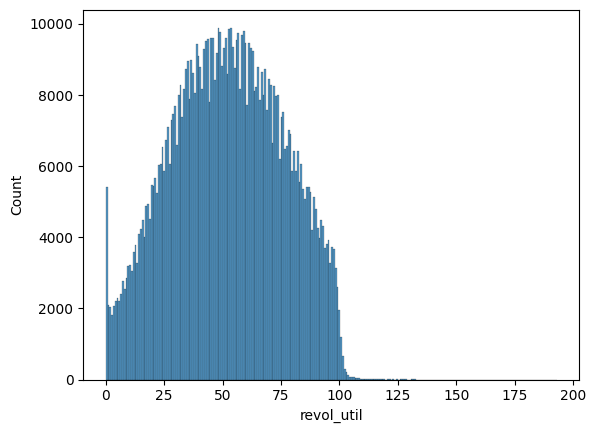

In [ ]:
sns.histplot(x="revol_util",data=df_63)#결측치는 평균으로

In [ ]:
df_63["revol_util"]=df_63["revol_util"].fillna(df_63["revol_util"].mean())

In [ ]:
df_63["revol_util"].isna().sum()

0

<Axes: xlabel='bc_open_to_buy', ylabel='Count'>

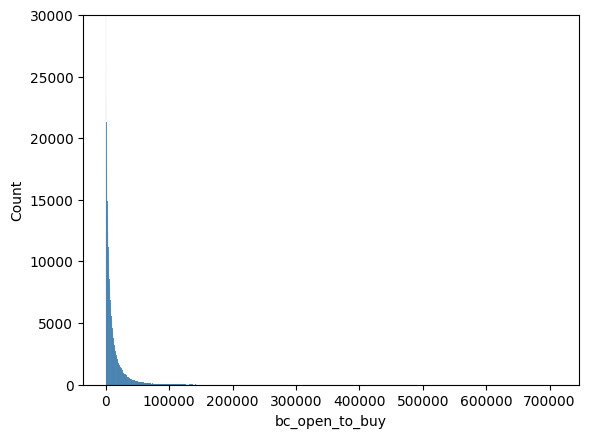

In [ ]:
plt.ylim(0,30000)
sns.histplot(x="bc_open_to_buy",data=df_63) #결측치는 중앙값으로 대체 #얘는 근데 나중에 로그변환이 적합해 보인다.

In [ ]:
df_63["bc_open_to_buy"]=df_63["bc_open_to_buy"].fillna(df_63["bc_open_to_buy"].median())

In [ ]:
df_63["bc_open_to_buy"].isna().sum()

0

In [ ]:
df_63["bc_open_to_buy"].value_counts()

0.0         14288
4811.0       8474
2000.0        731
500.0         703
1000.0        657
            ...  
56044.0         1
48122.0         1
70792.0         1
100182.0        1
73489.0         1
Name: bc_open_to_buy, Length: 65495, dtype: int64

<Axes: xlabel='bc_util', ylabel='Count'>

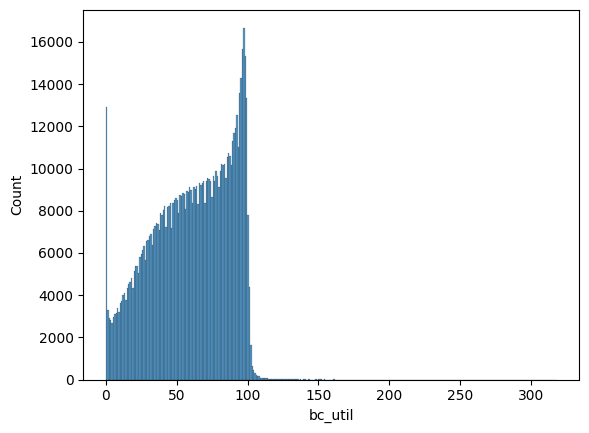

In [ ]:
sns.histplot(x="bc_util",data=df_63)#중앙값으로 대체

In [ ]:
df_63["bc_util"]=df_63["bc_util"].fillna(df_63["bc_util"].median())

In [ ]:
df_63["bc_util"].isna().sum()

0

<Axes: xlabel='mo_sin_old_il_acct', ylabel='Count'>

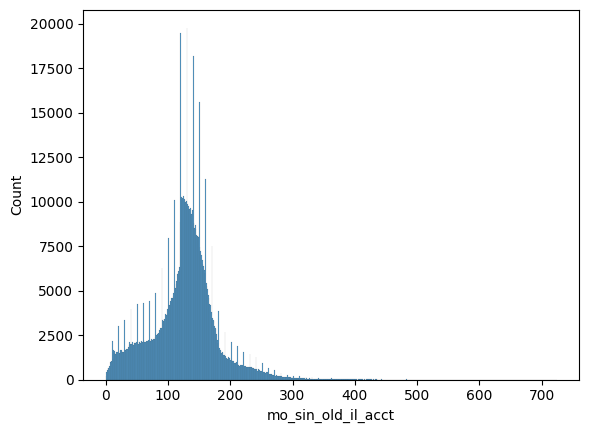

In [ ]:
sns.histplot(x="mo_sin_old_il_acct",data=df_63)#평균으로 대체

In [ ]:
df_63["mo_sin_old_il_acct"]=df_63["mo_sin_old_il_acct"].fillna(df_63["mo_sin_old_il_acct"].mean())

In [ ]:
df_63["mo_sin_old_il_acct"].isna().sum()

0

<Axes: xlabel='mths_since_recent_inq', ylabel='Count'>

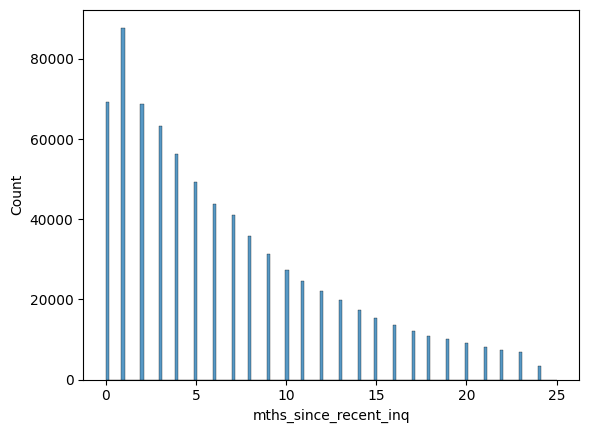

In [ ]:
sns.histplot(x="mths_since_recent_inq",data=df_63)#얘도 로그변환#중앙값으로 대체

In [ ]:
df_63["mths_since_recent_inq"]=df_63["mths_since_recent_inq"].fillna(df_63["mths_since_recent_inq"].median())

In [ ]:
df_63["mths_since_recent_inq"].isna().sum()

0

<Axes: xlabel='mths_since_recent_bc', ylabel='Count'>

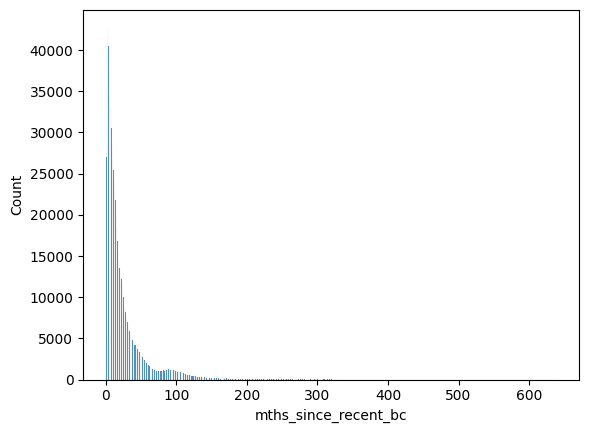

In [ ]:
sns.histplot(x="mths_since_recent_bc",data=df_63)#결측치는 #얘도 로그변환이 적합해보인다.#중앙값으로 대체

In [ ]:
df_63["mths_since_recent_bc"]=df_63["mths_since_recent_bc"].fillna(df_63["mths_since_recent_bc"].median())

In [ ]:
df_63["mths_since_recent_bc"].isna().sum()

0

<Axes: xlabel='num_tl_120dpd_2m', ylabel='Count'>

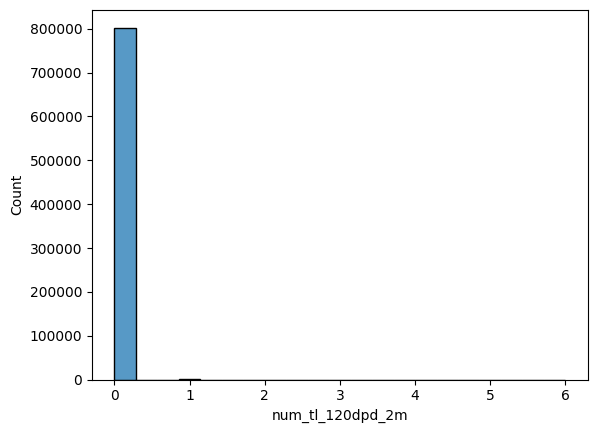

In [ ]:
sns.histplot(x="num_tl_120dpd_2m",data=df_63)#결측치는 0으로

In [ ]:
df_63["num_tl_120dpd_2m"]=df_63["num_tl_120dpd_2m"].fillna(df_63["num_tl_120dpd_2m"].median())

In [ ]:
df_63["num_tl_120dpd_2m"].isna().sum()

0

In [ ]:
df_63["num_tl_120dpd_2m"].value_counts()

0.0    843167
1.0       670
2.0        24
3.0         3
6.0         1
4.0         1
Name: num_tl_120dpd_2m, dtype: int64

<Axes: xlabel='percent_bc_gt_75', ylabel='Count'>

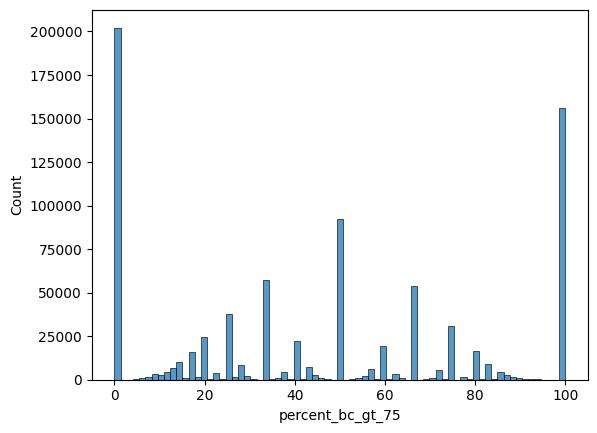

In [ ]:
sns.histplot(x="percent_bc_gt_75",data=df_63)#이런 feature가 가장 문제인데.. 그래도 전체적인 모양이 정규분포에 가까우므로 평균으로 결측치를 대체한다.

In [ ]:
df_63["percent_bc_gt_75"]=df_63["percent_bc_gt_75"].fillna(df_63["percent_bc_gt_75"].mean())

In [ ]:
df_63["percent_bc_gt_75"].isna().sum()

0

In [ ]:
df_63["revol_util"]

0         29.7
1         19.2
2         11.6
3         64.5
4         68.4
          ... 
843861    84.4
843862    39.0
843863    64.9
843864    68.1
843865    54.0
Name: revol_util, Length: 843866, dtype: float64

In [ ]:
df_63.columns[df_63.dtypes != "object"]

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il

<Axes: xlabel='inq_last_6mths', ylabel='Count'>

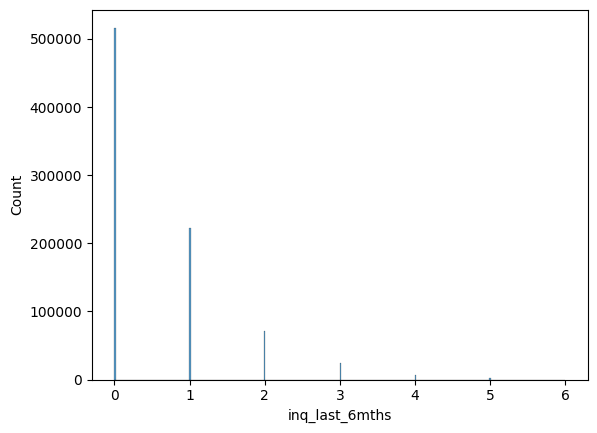

In [ ]:
sns.histplot(x="inq_last_6mths",data=df_63)#중앙값으로 대체

In [ ]:
df_63["inq_last_6mths"]=df_63["inq_last_6mths"].fillna(df_63["inq_last_6mths"].median())

<Axes: xlabel='num_rev_accts', ylabel='Count'>

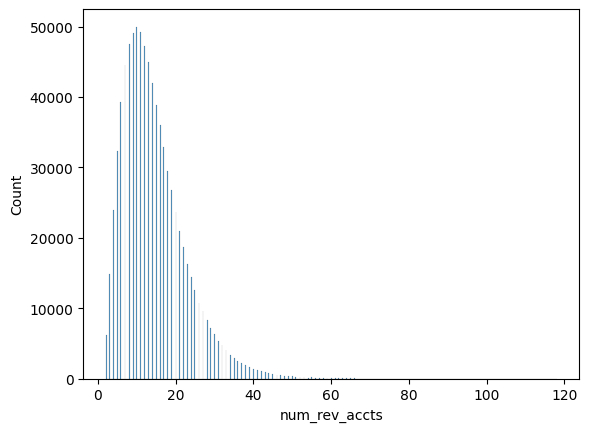

In [ ]:
sns.histplot(x="num_rev_accts",data=df_63)#중앙값으로 대체

In [ ]:
df_63["num_rev_accts"]=df_63["num_rev_accts"].fillna(df_63["num_rev_accts"].median())

In [ ]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df_63.isna().sum()

index                         0
id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
installment                   0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
acc_now_delinq                0
total_rev_hi_lim              0
acc_open_past_24mths          0
avg_cur_bal                   0
bc_open_to_buy                0
bc_util                       0
chargeof

In [ ]:
pd.options.display.max_columns=20
pd.options.display.max_rows=60

In [ ]:
df_63.columns[df_63.dtypes != "object"]

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il

In [ ]:
X=pd.concat([df_63[[ 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'acc_now_delinq', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit']],df_63_cat_encoding],axis=1)
y=df_63["loan_status"]

In [ ]:
len(df_63_cat_encoding.columns)

79

In [ ]:
X

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,3600.0,3600.0,3600.0,123.03,10.0,55000.0,5.91,0.0,1.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24700.0,24700.0,24700.0,820.28,10.0,65000.0,16.06,1.0,4.0,22.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35000.0,35000.0,35000.0,829.90,10.0,110000.0,17.06,0.0,0.0,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10400.0,10400.0,10400.0,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11950.0,11950.0,11950.0,405.18,4.0,34000.0,10.20,0.0,0.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843861,24000.0,24000.0,24000.0,543.50,7.0,95000.0,19.61,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843862,24000.0,24000.0,24000.0,515.74,10.0,108000.0,34.94,0.0,1.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843863,40000.0,40000.0,40000.0,859.56,9.0,227000.0,12.75,7.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
843864,24000.0,24000.0,24000.0,564.56,6.0,110000.0,18.30,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
DATA_for_loan_status=pd.concat([X,y],axis=1)

In [ ]:
DATA_for_loan_status


,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,feb,jan,jul,jun,mar,may,nov,oct,sep,loan_status
0,3600.0,3600.0,3600.0,123.03,10.0,55000.0,5.91,0.0,1.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,24700.0,24700.0,24700.0,820.28,10.0,65000.0,16.06,1.0,4.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,35000.0,35000.0,35000.0,829.90,10.0,110000.0,17.06,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10400.0,10400.0,10400.0,289.91,3.0,104433.0,25.37,1.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11950.0,11950.0,11950.0,405.18,4.0,34000.0,10.20,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843861,24000.0,24000.0,24000.0,543.50,7.0,95000.0,19.61,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
843862,24000.0,24000.0,24000.0,515.74,10.0,108000.0,34.94,0.0,1.0,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
843863,40000.0,40000.0,40000.0,859.56,9.0,227000.0,12.75,7.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
843864,24000.0,24000.0,24000.0,564.56,6.0,110000.0,18.30,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [ ]:
submit_path = "/content/Mydrive/MyDrive//Data_for_loan_status.csv"
DATA_for_loan_status.to_csv(submit_path, index=False)